In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine,text
from sqlalchemy.exc import SQLAlchemyError
import sys
sys.path.append(r'C:\Users\SHWETA\Olist_Ecommerce_Analysis')
from config.db_config import DB_Config
import seaborn as sns

engine = create_engine(f"mysql+pymysql://{DB_Config['user']}:{DB_Config['password']}@{DB_Config['host']}/{DB_Config['DB']}")


def run_query(query):
    try:
        return pd.read_sql_query(query,engine)
    except SQLAlchemyError as e:
        print(f"SQLAlchemyError: {e}")
    except Exception as e:
        print(f"Error: {e}")

In [2]:
tables = run_query("SHOW TABLES;")
tables

,Tables_in_olist
0,customers
1,geolocation
2,order_items
3,orders
4,payments
5,product_category_translation
6,products
7,reviews
8,sellers


In [3]:
for table in tables['Tables_in_olist']:
    TBL = run_query(f"SELECT * FROM {table} LIMIT 2")
    display(TBL)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [4]:
for table in tables['Tables_in_olist']:
    display(run_query(f"DESCRIBE TABLE {table}"))

,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,customers,None,ALL,None,None,None,None,97184,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,geolocation,None,ALL,None,None,None,None,999639,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,order_items,None,ALL,None,None,None,None,111622,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,orders,None,ALL,None,None,None,None,98770,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,payments,None,ALL,None,None,None,None,103390,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,product_category_translation,None,ALL,None,None,None,None,71,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,products,None,ALL,None,None,None,None,31962,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,reviews,None,ALL,None,None,None,None,97601,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,sellers,None,ALL,None,None,None,None,3095,100.0,None


In [4]:
run_query("""SELECT 
    YEAR(o.order_purchase_timestamp) AS order_year,
    ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue
FROM orders o
JOIN order_items oi 
    ON o.order_id = oi.order_id
WHERE o.order_status = 'delivered'
GROUP BY YEAR(o.order_purchase_timestamp)
ORDER BY order_year;
""")

,order_year,total_revenue
0,2016,46653.74
1,2017,6921535.24
2,2018,8451584.77


### Popular Payment Method.

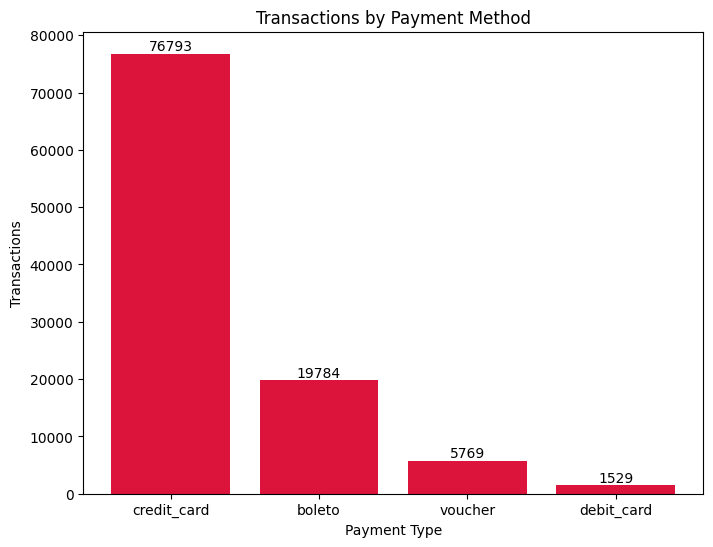

In [21]:
df_payment = run_query("""
    SELECT 
        payment_type,
        COUNT(*) AS total_transactions,
        SUM(payment_value) AS total_revenue,
        AVG(payment_value) AS avg_order_value
    FROM payments
    GROUP BY payment_type
    ORDER BY total_revenue DESC;
""")

plt.figure(figsize=(8,6))
bars = plt.bar(df_payment['payment_type'],df_payment['total_transactions'],color='crimson')
plt.bar_label(bars,fmt='%.0f')
plt.title("Transactions by Payment Method")
plt.ylabel("Transactions")
plt.xlabel("Payment Type")
plt.show()


## 💳 Payment Amount Distribution by Payment Type

### 🔍 Key Insights
- **Credit Card**: Highest median and widest spread; often used for large purchases.  
- **Boleto**: Moderate median, wide range; preferred for mid-to-high purchases.  
- **Voucher**: Lowest median; mostly small-value transactions, driven by discounts/promotions.  
- **Debit Card**: Balanced usage; medium-value payments with some outliers.  

### ✅ Business Suggestions
- **Boost Credit Card Usage**: Offer EMI, cashback, and reward tie-ups.  
- **Optimize Boleto**: Provide early-payment discounts and convert users to credit cards.  
- **Leverage Vouchers**: Use for customer acquisition; bundle with higher-value products.  
- **Enhance Debit Card Appeal**: Promote secure payments and instant cashback.  
- **Target Premium Users**: High-value outliers show a segment for loyalty and premium offers.  



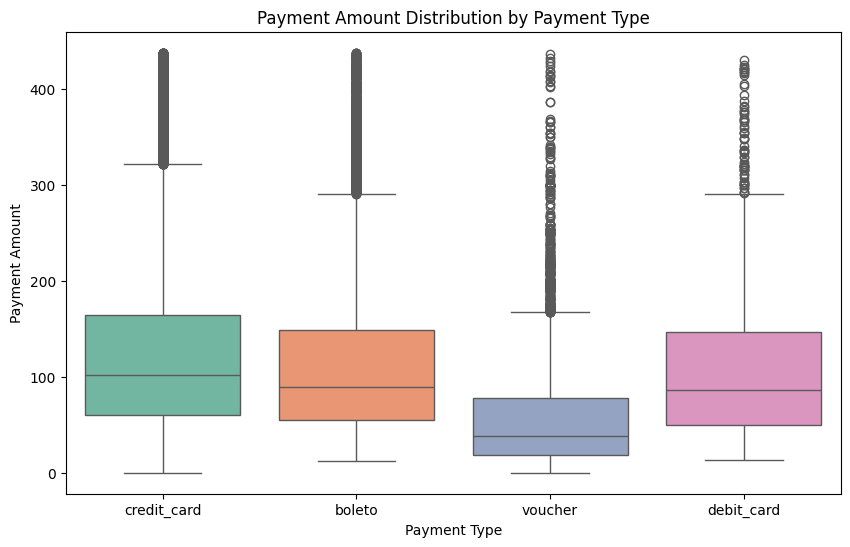

In [20]:
# Query to get individual payment records
df_payments = run_query("""
    SELECT payment_type, payment_value
    FROM payments
""")

# Optional: limit extreme outliers for better visualization
upper_limit = df_payments['payment_value'].quantile(0.95)
df_payments_filtered = df_payments[df_payments['payment_value'] <= upper_limit]

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='payment_type', y='payment_value', data=df_payments_filtered, palette='Set2',hue='payment_type')
plt.title("Payment Amount Distribution by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Payment Amount")
plt.show()

### Observations:
- Only **3.12% of customers are repeat buyers**, which is very low.  
- The vast majority (**~97%**) of customers purchase only once.

### Suggestions:
- Implement **customer retention strategies**, such as:
  - Loyalty programs or reward points for repeat purchases.
  - Personalized emails or discounts to encourage repeat orders.
  - Targeted marketing campaigns to previous customers.
- Analyze the **products or categories** with higher repeat purchase rates and promote them further.

In [ ]:
run_query("""WITH customer_orders AS (
    SELECT 
        c.customer_unique_id,
        COUNT(o.order_id) AS total_orders
    FROM orders o
    JOIN customers c 
      ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
)
SELECT 
    COUNT(*) AS total_customers,
    SUM(CASE WHEN total_orders = 1 THEN 1 ELSE 0 END) AS one_time_customers,
    SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) AS repeat_customers,
    ROUND(SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) 
      AS repeat_customer_percentage
FROM customer_orders;
""")

,total_customers,one_time_customers,repeat_customers,repeat_customer_percentage
0,96096,93099.0,2997.0,3.12


In [ ]:
df_repeat_sales = run_query("""
WITH customer_orders AS (
    SELECT 
        c.customer_unique_id,
        COUNT(DISTINCT o.order_id) AS total_orders,
        SUM(oi.price) AS total_revenue
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    JOIN order_items oi ON o.order_id = oi.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY c.customer_unique_id
)
SELECT 
    SUM(CASE WHEN total_orders > 1 THEN total_revenue ELSE 0 END) AS repeat_customers_revenue,
    SUM(CASE WHEN total_orders = 1 THEN total_revenue ELSE 0 END) AS one_time_customers_revenue,
    SUM(total_revenue) AS total_revenue,
    ROUND(SUM(CASE WHEN total_orders > 1 THEN total_revenue ELSE 0 END) / SUM(total_revenue) * 100, 2) AS repeat_revenue_percentage
FROM customer_orders;
""")

df_repeat_sales


,repeat_customers_revenue,one_time_customers_revenue,total_revenue,repeat_revenue_percentage
0,728408.75,1.249309e+07,1.322150e+07,5.51


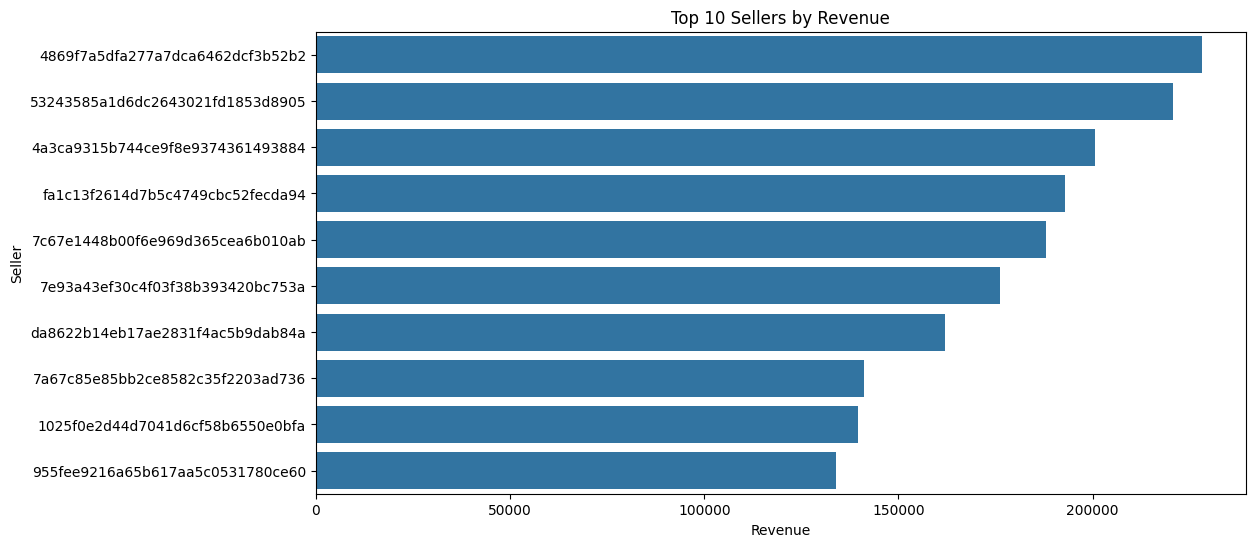

In [8]:
df_seller = run_query("""
    SELECT 
        oi.seller_id,
        COUNT(oi.order_id) AS total_orders,
        SUM(oi.price) AS total_revenue,
        AVG(r.review_score) AS average_review_score
    FROM order_items oi
    JOIN orders o ON oi.order_id = o.order_id
    JOIN reviews r ON o.order_id = r.order_id
    GROUP BY oi.seller_id
    ORDER BY total_revenue DESC
    LIMIT 10;
""")

plt.figure(figsize=(12,6))
sns.barplot(x="total_revenue", y="seller_id", data=df_seller)
plt.title("Top 10 Sellers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Seller")
plt.show()


### Seller Review Score vs Total Revenue

This scatter plot visualizes the relationship between **average seller review scores** (`avg_review_score`) and **total revenue** generated by sellers (`total_revenue`). The size of each point represents the **total number of orders** for that seller.

#### Observations:
- Most sellers have average review scores between **3.5 and 5**.
- Sellers with **higher review scores (around 4–4.5)** tend to generate **significantly higher revenue**.
- A few sellers with very high revenue stand out as **outliers**, indicating exceptional performance.
- There is a **positive correlation** between review score and revenue, suggesting that better-reviewed sellers attract more customers and sales.

#### Insights:
- Improving seller review scores could directly impact revenue generation.
- High-performing sellers (high revenue and review scores) could be analyzed for **best practices** to guide lower-performing sellers.
- Low review scores correlate with lower revenue, highlighting the importance of **customer satisfaction and service quality**.

#### Suggestions:
- Encourage sellers to maintain high review scores through incentives or training.
- Monitor outlier sellers to understand strategies that drive exceptional performance.
- Use review scores as a **key metric for seller evaluation and prioritization**.


Text(0.5, 1.0, 'Seller Review Score vs Revenue')

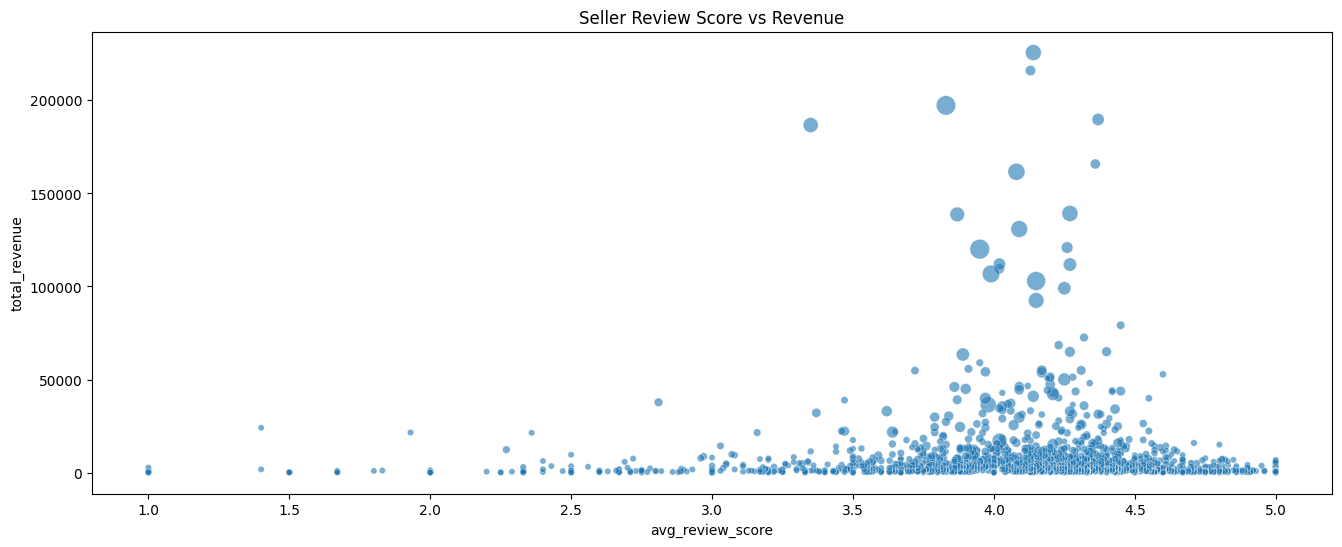

In [ ]:
df_seller_reviws = run_query("""SELECT 
    oi.seller_id,
    ROUND(AVG(r.review_score),2) AS avg_review_score,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS total_revenue
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
WHERE o.order_status = 'delivered'
GROUP BY oi.seller_id
ORDER BY avg_review_score DESC;""")

plt.figure(figsize=(16,6))
sns.scatterplot(data=df_seller_reviws, x='avg_review_score', y='total_revenue', size='total_orders', sizes=(20, 200), alpha=0.6, legend=False)
plt.title("Seller Review Score vs Revenue")
plt.show()

# 📊 Average Installments by Order Category  

### 🔍 Observations  
- **Low Value Orders**  
  - Avg installments: **2.7**  
  - Total orders: **99,619** (highest volume)  
  - Customers mostly pay upfront or with very few installments.  

- **Medium Value Orders**  
  - Avg installments: **5.9**  
  - Total orders: **3,106**  
  - Customers prefer spreading payments more than in low-value orders.  

- **High Value Orders**  
  - Avg installments: **6.6** (highest)  
  - Total orders: **1,150** (lowest volume)  
  - Strong reliance on installments, reflecting affordability concerns.  

### 💡 Insights  
- Clear **positive correlation** between order value and average installments.  
- **High-value orders → High installments** but **low order count**.  
- **Low-value orders dominate in volume**, with little use of installments.  

### ✅ Suggestions  
1. **Installment Marketing Strategy**  
   - Promote **EMI options** more for high-value and medium-value products.  
   - Highlight **affordable monthly payments** to reduce purchase hesitation.  

2. **Cross-Selling Opportunity**  
   - For low-value customers, encourage **bundled offers** or **installment discounts** to increase cart value.  

3. **Risk & Profitability**  
   - Higher installments in medium/high-value orders may increase **credit risk**.  
   - Use **eligibility checks** or offer **interest-based EMIs** for safety.  

4. **Customer Segmentation**  
   - **Low-value segment** → Focus on **volume & discounts**.  
   - **Medium/High-value segment** → Focus on **financing flexibility**.  


  order_category  avg_installments  max_installments  total_orders
0      Low Value          2.716219                24         99619
1   Medium Value          5.877656                24          3106
2     High Value          6.583478                24          1150


C:\Users\SHWETA\AppData\Local\Temp\ipykernel_11240\3896530144.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = payment_df.groupby('order_category').agg(


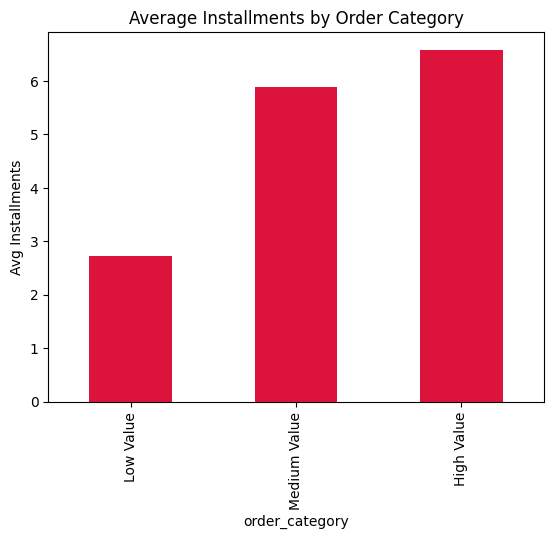

In [9]:
payment_df = run_query("""
SELECT 
    payment_value,
    payment_installments
FROM payments;
""")



# Categorize orders
payment_df['order_category'] = pd.cut(
    payment_df['payment_value'],
    bins=[0, 500, 1000, payment_df['payment_value'].max()],
    labels=['Low Value','Medium Value','High Value']
)

# Group & analyze
summary = payment_df.groupby('order_category').agg(
    avg_installments=('payment_installments','mean'),
    max_installments=('payment_installments','max'),
    total_orders=('payment_installments','count')
).reset_index()

print(summary)

# Plot
summary.plot(x='order_category', y='avg_installments', kind='bar', legend=False,color='crimson')
plt.title("Average Installments by Order Category")
plt.ylabel("Avg Installments")
plt.show()


   total_orders  late_orders  ontime_orders  late_percentage
0         96478       7826.0        88644.0             8.11


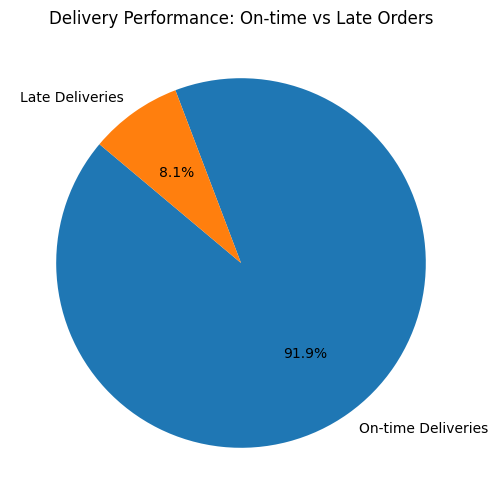

In [ ]:
df_delivery = run_query("""
SELECT 
    COUNT(*) AS total_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS late_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date <= o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS ontime_orders,
    ROUND(SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) / COUNT(*) * 100, 2) AS late_percentage
FROM orders o
WHERE o.order_status = 'delivered';
""")

print(df_delivery)




labels = ['On-time Deliveries', 'Late Deliveries']
sizes = [df_delivery['ontime_orders'][0], df_delivery['late_orders'][0]]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Delivery Performance: On-time vs Late Orders")
plt.show()


10.45185185185185


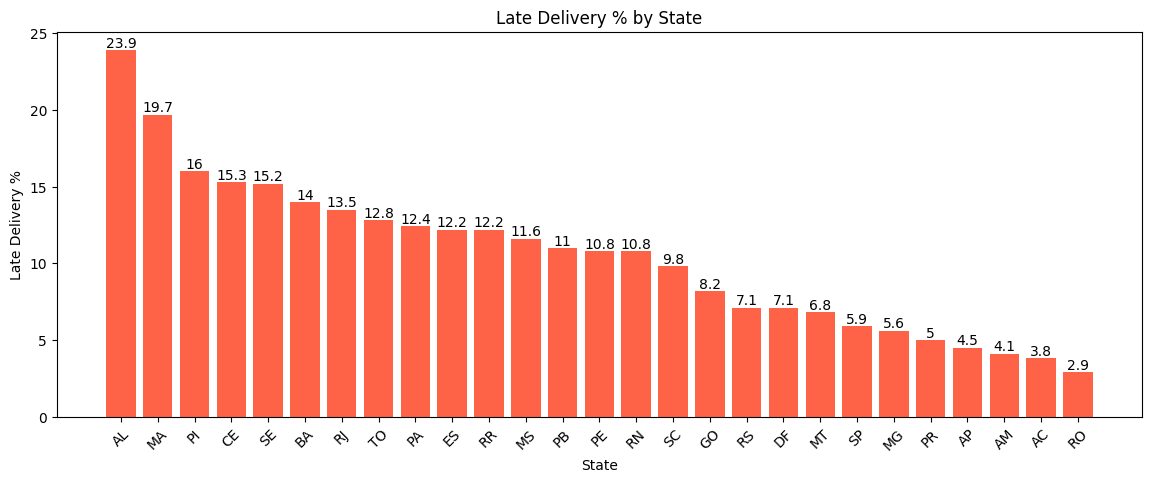

In [ ]:
# Delivery Performance by State
df_state = run_query("""
SELECT 
    c.customer_state,
    COUNT(*) AS total_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS late_orders,
    ROUND(SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) / COUNT(*) * 100, 1) AS late_percentage
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
GROUP BY c.customer_state
ORDER BY late_percentage DESC;
""")

# Bar Plot

plt.figure(figsize=(14,5))
bars = plt.bar(df_state['customer_state'], df_state['late_percentage'], color='tomato')
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Late Delivery % by State")
plt.xlabel("State")
plt.ylabel("Late Delivery %")
plt.show()


### ⏱️ Delivery Time vs Customer Reviews

**Key Finding:**  
- There is a **very strong negative correlation (-0.97)** between **delivery days** and **average review scores**.  
- This shows that **longer delivery times strongly reduce customer satisfaction**.  

**Observations:**  
- Customers expect **fast and reliable delivery**.  
- Even if the product quality is good, **delays negatively impact the overall perception** of the purchase experience.  
- Slow delivery can also **reduce repeat purchase behavior** and increase returns or cancellations.  

**Insights:**  
- Delivery time is one of the **most influential factors in customer satisfaction**, almost as impactful as product quality.  
- Shorter delivery windows directly translate into **higher review scores and stronger customer loyalty**.  

**Suggestions:**  
- Invest in **faster logistics and regional warehouses** to cut delivery times.  
- Offer **same-day or next-day delivery options** in high-demand regions.  
- Provide **accurate delivery estimates** and proactive updates to manage expectations.  
- Prioritize **on-time delivery performance tracking** as a key business KPI.  


   review_score  avg_delivery_days  total_reviews
0             1            21.2519           9409
1             2            16.6059           2941
2             3            14.2043           7962
3             4            12.2531          18987
4             5            10.6254          57060


Review-Delivery_time correlation: -0.9749361374309775


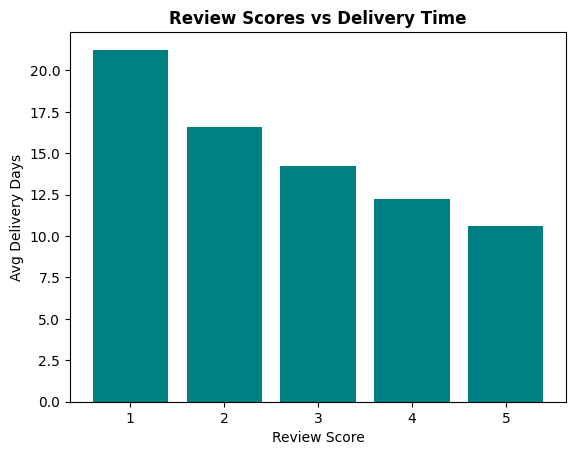

In [ ]:
review_delivery_df = run_query(
    """SELECT 
    r.review_score,
    AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) AS avg_delivery_days,
    COUNT(*) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
WHERE o.order_delivered_customer_date IS NOT NULL
GROUP BY r.review_score
ORDER BY r.review_score;
"""
)
print(review_delivery_df)

rev_delv_corr = review_delivery_df['avg_delivery_days'].corr(review_delivery_df['review_score'])
print(f"\n\nReview-Delivery_time correlation: {rev_delv_corr}")

plt.bar(review_delivery_df['review_score'], review_delivery_df['avg_delivery_days'],color='teal')
plt.xlabel("Review Score")
plt.ylabel("Avg Delivery Days")
plt.title("Review Scores vs Delivery Time",fontweight='bold')
plt.show()


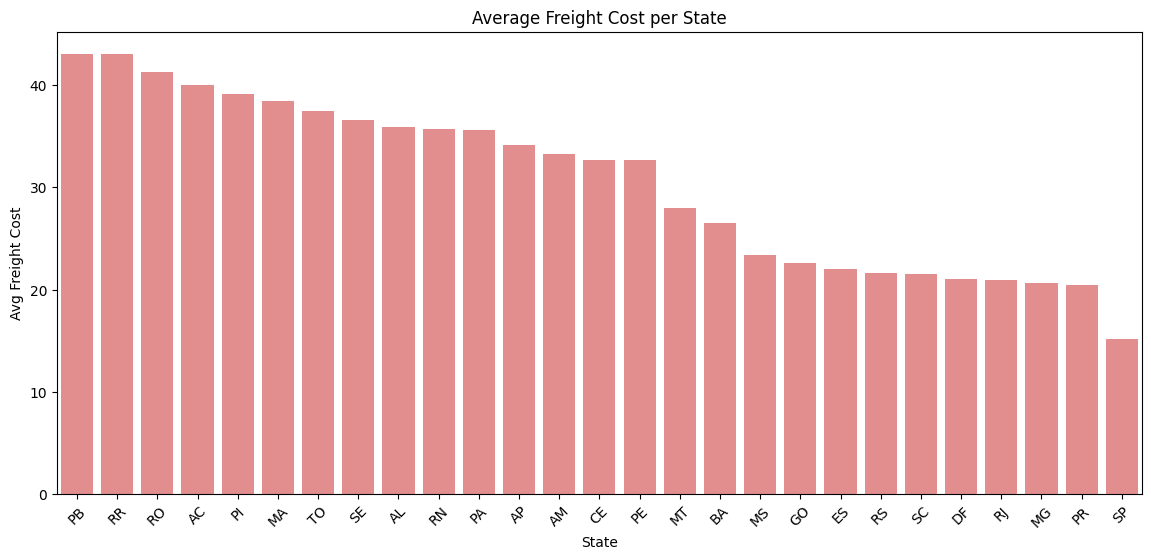

In [31]:
df_freight = run_query("""
    SELECT 
        c.customer_state,
        ROUND(AVG(oi.freight_value), 2) AS avg_freight
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN customers c ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
    GROUP BY c.customer_state
    ORDER BY avg_freight DESC;
""")

plt.figure(figsize=(14,6))
sns.barplot(
    x='customer_state', 
    y='avg_freight', 
    data=df_freight, 
    color='lightcoral'
)
plt.title("Average Freight Cost per State")
plt.xlabel("State")
plt.ylabel("Avg Freight Cost")
plt.xticks(rotation=45)
plt.show()

### 🚚 Freight Cost vs Customer Reviews

**Key Finding:**  
- There is a **very strong negative correlation (-0.99)** between **freight cost** and **average review scores**.  
- This indicates that **higher freight costs are directly linked to lower customer satisfaction**.  

**Observations:**  
- Customers perceive **high shipping charges as unfair**, which significantly lowers their overall satisfaction even if the product quality is good.  
- Since reviews directly influence future sales and trust, high freight costs can **damage long-term brand reputation**.  

**Insights:**  
- Freight cost is not just a **logistics factor** but also a **critical customer experience driver**.  
- Even small increases in freight costs can lead to disproportionately large drops in review scores.  

**Suggestions:**  
- **Optimize shipping logistics** to reduce costs (e.g., regional warehouses, bulk shipping).  
- Introduce **free shipping thresholds** (e.g., free delivery for orders above a certain value).  
- Consider **subsidizing freight costs** in highly competitive categories to improve reviews and retention.  
- **Highlight delivery transparency**: communicate clearly about shipping charges to manage expectations.  


   review_score  avg_freight_cost  total_reviews
0             1             21.21          14235
1             2             20.94           3874
2             3             20.29           9423
3             4             20.05          21315
4             5             19.57          63525


 Average_freight_cost-review Correlation: -0.9910385366115722


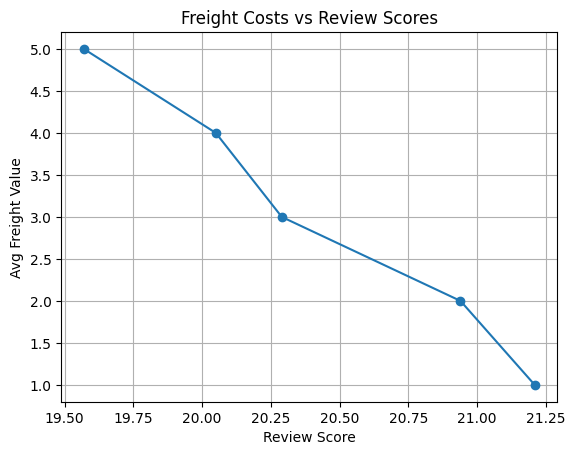

In [12]:
rev_frg_df = run_query(
    """SELECT 
    r.review_score,
    ROUND(AVG(p.freight_value),2) AS avg_freight_cost,
    COUNT(*) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items p ON o.order_id = p.order_id
GROUP BY r.review_score
ORDER BY r.review_score;
"""
)

print(rev_frg_df)

rev_frg_corr = rev_frg_df['avg_freight_cost'].corr(rev_frg_df['review_score'])
print(f"\n\n Average_freight_cost-review Correlation: {rev_frg_corr}")


# Plot
plt.plot(rev_frg_df['avg_freight_cost'], rev_frg_df['review_score'], marker='o')
plt.xlabel("Review Score")
plt.ylabel("Avg Freight Value")
plt.title("Freight Costs vs Review Scores")
plt.grid(True)
plt.show()


In [22]:
df_weight_freight = run_query("""
    SELECT 
        p.product_id,
        p.product_weight_g,
        oi.freight_value
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    WHERE p.product_weight_g IS NOT NULL
      AND oi.freight_value IS NOT NULL;
""")

correlation = df_weight_freight['product_weight_g'].corr(df_weight_freight['freight_value'])
print("Correlation between product weight and freight cost:", correlation)


Correlation between product weight and freight cost: 0.6104202350972832


### 📊 Reviews and Orders Correlation Analysis  

**Key Observations:**  
- There is a **strong positive correlation** between review scores and total orders (**r = 0.80**).  
- The number of reviews and orders are **perfectly correlated** (**r = 1.0**), meaning review data directly reflects customer order volume.  
- Majority of customers give **5-star reviews (≈57k)**, followed by **4-star reviews (≈19k)**, indicating generally high customer satisfaction.  
- However, there are **~9.4k 1-star reviews**, which highlight potential dissatisfaction areas that need attention.  

**Insights:**  
- Higher review scores are linked with higher order volumes, suggesting **customer satisfaction drives repeat purchases and loyalty**.  
- Negative reviews (1–2 stars) account for **~12% of all reviews**, which is significant and can impact reputation if ignored.  
- Neutral reviews (3 stars, ~8k) indicate customers who are **neither fully satisfied nor dissatisfied**, representing an opportunity to convert them into promoters.  

**Suggestions:**  
- 📌 **Target low-rated customers** (1–2 stars) with personalized support, refunds, or discount vouchers to improve satisfaction and reduce churn.  
- 📌 Analyze top reasons behind **negative reviews** (late delivery, high freight cost, product quality issues) and prioritize fixing them.  
- 📌 Encourage **review collection campaigns** for satisfied customers (4–5 stars) to build credibility and trust for new buyers.  
- 📌 Convert **neutral 3-star customers** into promoters by offering post-purchase engagement such as follow-ups or loyalty points.  


In [33]:
df_review_orders = run_query("""
    SELECT 
        r.review_score,
        COUNT(r.review_id) AS total_reviews,
        COUNT(DISTINCT o.order_id) AS total_orders
    FROM reviews r
    JOIN orders o 
        ON r.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY r.review_score
    ORDER BY r.review_score;
""")

review_orders_corr = df_review_orders['review_score'].corr(df_review_orders['total_orders'])
print(f"Review-Orders Correlation: {review_orders_corr}")

review_number_orders_corr = df_review_orders['total_reviews'].corr(df_review_orders['total_reviews'])
print(f"\nReview_Number-Orders Correlation: {review_number_orders_corr}")
df_review_orders

Review-Orders Correlation: 0.8038127071590181

Review_Number-Orders Correlation: 1.0


,review_score,total_reviews,total_orders
0,1,9406,9381
1,2,2941,2938
2,3,7961,7942
3,4,18987,18943
4,5,57066,56817


**Identification of Sellers having low-review scores.**

In [13]:
print("Sellers with Consistently Bad Reviews:")
run_query(
    """SELECT 
    oi.seller_id,
    AVG(r.review_score) AS avg_review_score,
    COUNT(r.review_id) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY oi.seller_id
HAVING avg_review_score < 3 AND total_reviews > 50
ORDER BY avg_review_score ASC
LIMIT 10;
"""
)


Sellers with Consistently Bad Reviews:


,seller_id,avg_review_score,total_reviews
0,1ca7077d890b907f89be8c954a02686a,2.1985,136
1,2eb70248d66e0e3ef83659f71b244378,2.7129,209
2,602044f2c16190c2c6e45eb35c2e21cb,2.9322,59
3,54965bbe3e4f07ae045b90b0b8541f52,2.9383,81
4,a49928bcdf77c55c6d6e05e09a9b4ca5,2.9528,106
5,972d0f9cf61b499a4812cf0bfa3ad3c4,2.9643,84


## Key Insight: High Revenue from Low-Rated Sellers

An interesting anomaly emerges:  
- **1 rated sellers** show **surprisingly high revenue** despite poor customer feedback.  
- This suggests that certain low-rated sellers might be selling **high-demand or essential products** that customers buy regardless of service issues.  
- It highlights a **business risk**—while revenue flows in, poor reviews may hurt long-term customer retention.  

**Recommendation:**  
- Investigate these sellers further.  
- Provide support, stricter quality checks, or onboarding improvements to align revenue with better customer experience.  


In [ ]:
run_query("""SELECT 
    ROUND(r.review_score, 0) AS rounded_review_score,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price + oi.freight_value) AS total_revenue,
    AVG(oi.price + oi.freight_value) AS avg_order_value
FROM reviews r
JOIN orders o 
    ON r.order_id = o.order_id
JOIN order_items oi 
    ON o.order_id = oi.order_id
WHERE o.order_status = 'delivered'
GROUP BY rounded_review_score
ORDER BY rounded_review_score;""")



,rounded_review_score,total_orders,total_revenue,avg_order_value
0,1,9381,1815882.92,144.404208
1,2,2938,499954.76,135.122908
2,3,7942,1202352.19,130.096536
3,4,18943,2932776.08,138.442980
4,5,56817,8910279.16,140.736024


**Identification of problematic product categories for improvement in reviews.**


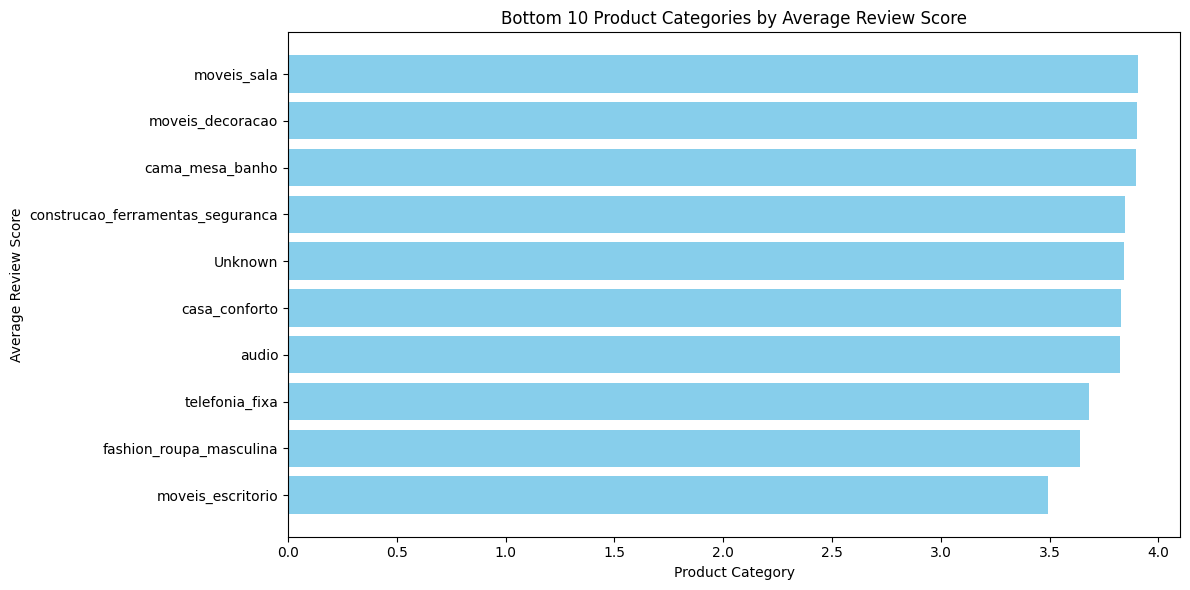

In [14]:
low_pref_cat = run_query(
    """SELECT 
    p.product_category_name,
    AVG(r.review_score) AS avg_review_score,
    COUNT(r.review_id) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
HAVING COUNT(r.review_id) > 50  -- only categories with enough data
ORDER BY avg_review_score ASC
LIMIT 10;
"""
)

low_pref_cat['product_category_name'] = low_pref_cat['product_category_name'].fillna("Unknown")


plt.figure(figsize=(12,6)) 
plt.barh(low_pref_cat['product_category_name'], low_pref_cat['avg_review_score'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.title('Bottom 10 Product Categories by Average Review Score')
plt.tight_layout()  
plt.show()


In [13]:
df_cat_growth = run_query(
    """SELECT 
    p.product_category_name,
    YEAR(o.order_purchase_timestamp) AS order_year,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
WHERE o.order_status = 'delivered'
GROUP BY p.product_category_name, YEAR(o.order_purchase_timestamp)
ORDER BY revenue DESC;
"""
)


# Low revenue generating states.

### Observations:
- These states have fewer customers and orders, resulting in lower revenue.
- Most of these are smaller or less densely populated regions.
- Revenue growth opportunities exist by targeting marketing campaigns and promotions in these states.
### Suggestions:
- Focus on improving customer acquisition and retention strategies.
- Offer region-specific promotions or discounts to boost sales.
- Analyze product preferences and stock availability to better cater to these states.

Customers-Revenue Correlation: 0.999040771828745


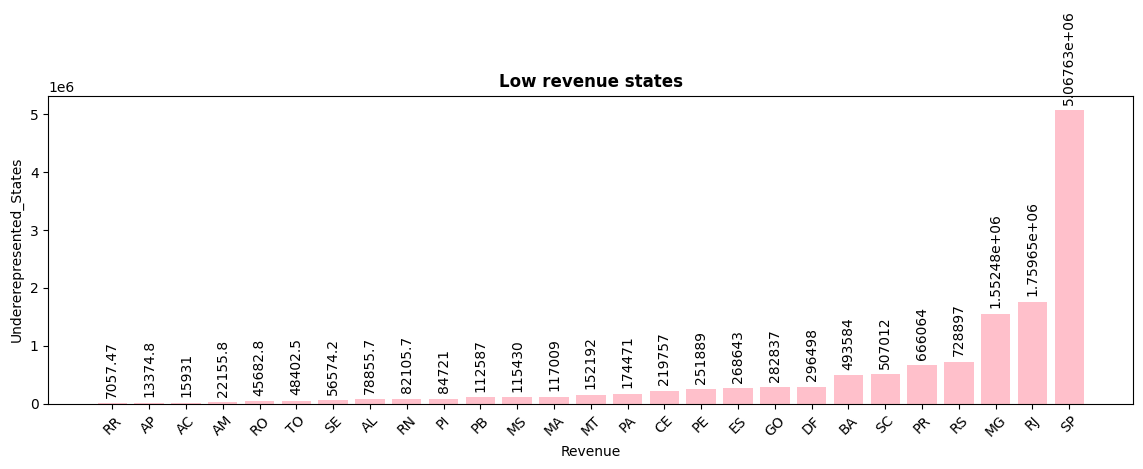

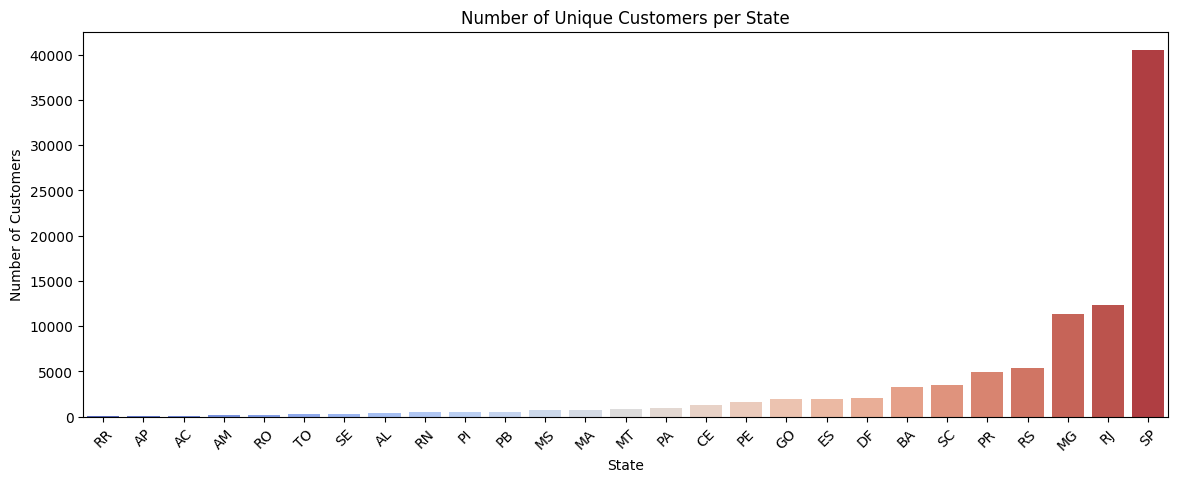

In [29]:
df_regions = run_query(
    """SELECT 
    c.customer_state,
    COUNT(DISTINCT o.customer_id) AS unique_customers,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS revenue

FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'  
GROUP BY c.customer_state
ORDER BY revenue ASC;
"""
)

customer_revenue_corr = df_regions['unique_customers'].corr(df_regions['revenue'])
print(f"Customers-Revenue Correlation: {customer_revenue_corr}")

underrepresented = df_regions[df_regions['revenue'] < df_regions['revenue'].quantile(.25)]
underrepresented

plt.figure(figsize=(14,4))
bars = plt.bar(df_regions['customer_state'],df_regions['revenue'],color='pink')
plt.bar_label(bars,rotation=90,padding=4)
plt.xlabel("Revenue")
plt.ylabel("Undererepresented_States")
plt.title("Low revenue states",fontweight= 'bold')
plt.xticks(rotation=45)
plt.show()

# Sort states by number of customers for better visualization
df_customers_sorted = df_regions.sort_values('unique_customers', ascending=True)

plt.figure(figsize=(14,5))
sns.barplot(x='customer_state', y='unique_customers', data=df_customers_sorted, palette='coolwarm',hue='customer_state')
plt.title("Number of Unique Customers per State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [17]:
run_query(
    """SELECT 
    strftime('%%%Y-%%%m', o.order_purchase_timestamp) AS year_month,
    SUM(oi.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
WHERE o.order_status = 'delivered'
GROUP BY strftime('%%%Y-%%%m', o.order_purchase_timestamp)
ORDER BY year_month;
"""
)

Error: unsupported format character 'Y' (0x59) at index 25


C:\Users\SHWETA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


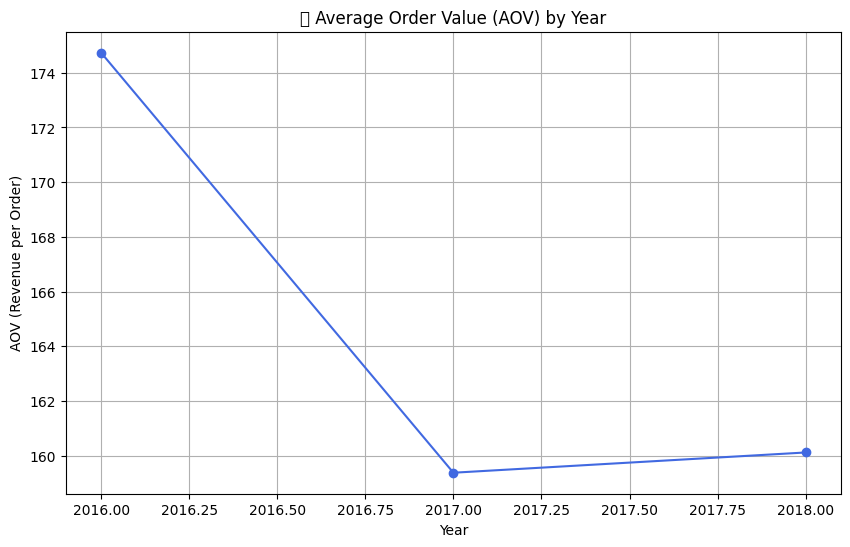

In [ ]:
df_aov = run_query("""
    SELECT 
        YEAR(o.order_purchase_timestamp) AS order_year,
        ROUND(SUM(oi.price + oi.freight_value),2) AS total_revenue,
        COUNT(DISTINCT o.order_id) AS total_orders,
        ROUND(SUM(oi.price + oi.freight_value) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY YEAR(o.order_purchase_timestamp)
    ORDER BY order_year;
""")

# Plot AOV over time
plt.figure(figsize=(10,6))
plt.plot(df_aov['order_year'], df_aov['avg_order_value'], marker='o', color='royalblue')
plt.title("Average Order Value (AOV) by Year")
plt.xlabel("Year")
plt.ylabel("AOV (Revenue per Order)")
plt.grid(True)
plt.show()


### 💰 Average Order Value (AOV) by Product Category (Top 15)

**Observations:**  
- **PCs** lead significantly with the highest AOV (~1290), far above all other categories.  
- **Portable home appliances (coffee makers, ovens, etc.)** have a strong AOV (~684).  
- **Large appliances (electrodomesticos_2, ~521)** and **industrial/agro equipment (~431)** also generate high-value orders.  
- Mid-range categories like **musical instruments (~331)** and **kitchen appliances (~325)** maintain decent AOVs.  
- Mass-market categories (e.g., **garden tools, watches_gifts, construction**) show much lower AOVs (~220–250).  

**Insights:**  
- Categories like **PCs and large appliances** are **high-ticket items** but likely have **lower purchase frequency**.  
- **Mid-value items (kitchen appliances, musical instruments)** strike a balance between price and demand.  
- **Low-value categories (watches_gifts, garden tools, etc.)** rely on **high sales volume** rather than AOV for revenue.  

**Suggestions:**  
- **Focus marketing on high AOV categories (PCs, appliances)** with targeted campaigns, financing/EMI offers, and premium delivery to encourage conversions.  
- **Upsell & cross-sell mid-range categories** (e.g., pairing musical instruments with accessories, kitchen appliances with utensils) to raise order value.  
- For **low AOV, high-volume categories**, prioritize **bundling strategies** and **discount campaigns** to increase basket size.  
- Monitor customer segments: **Tech enthusiasts and household upgraders** are key drivers for high AOV products.  

📌 Overall, AOV insights suggest that while **revenue is driven by a mix of high-value infrequent purchases and low-value frequent ones**, profitability can be maximized by combining **premium upselling** with **volume-driven promotions**.


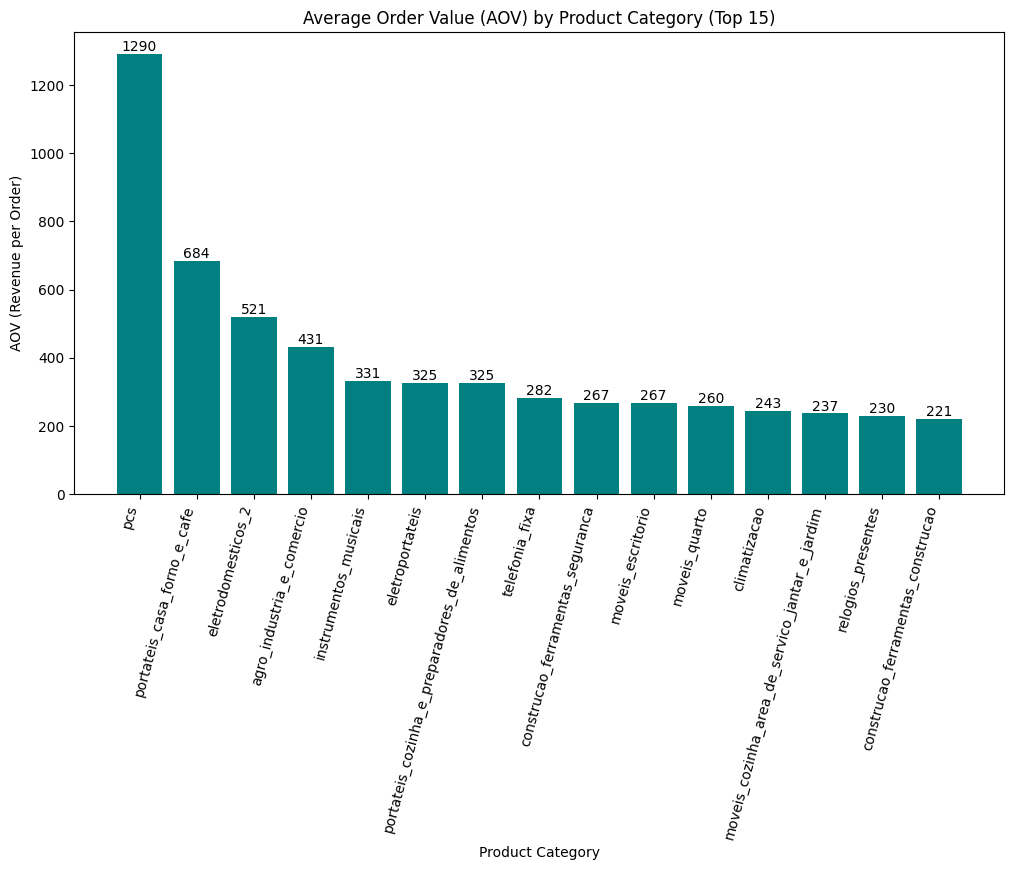

In [21]:
df_aov_cat = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT o.order_id) AS total_orders,
        ROUND(SUM(oi.price + oi.freight_value) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY avg_order_value DESC
    LIMIT 15;
""")

# Plot AOV by category
plt.figure(figsize=(12,6))
bars = plt.bar(df_aov_cat['product_category_name'], df_aov_cat['avg_order_value'], color="teal")
plt.xticks(rotation=75, ha="right")
plt.title("Average Order Value (AOV) by Product Category (Top 15)")
plt.xlabel("Product Category")
plt.ylabel("AOV (Revenue per Order)")

# Add values on bars
plt.bar_label(bars, fmt="%.0f")
plt.show()


### 💵 Top 15 Revenue-Generating Product Categories

**Observations:**  
- **Health & Beauty (beleza_saude)** leads with the highest revenue (~1.41M), followed by **Watches & Gifts (~1.26M)** and **Bed & Bath (~1.22M)**.  
- **Sports & Leisure (~1.11M)** and **Computers & Accessories (~1.03M)** are also strong contributors.  
- Mid-tier categories include **Furniture & Decor (~880K)**, **Housewares (~758K)**, and **Cool Stuff (~691K)**.  
- Lower revenue categories within the top 15 include **Perfume (~443K)**, **Phones (~379K)**, and **Office Furniture (~335K)**.  

**Insights:**  
- High-revenue categories are largely **daily essentials (health, beauty, bed & bath, housewares)** and **status-driven products (watches, electronics, sports gear)**.  
- Essentials tend to have **lower AOV** but higher purchase frequency, whereas lifestyle/status products drive higher value per order.  
- Categories like **telephony and office furniture** underperform, suggesting either niche demand or higher competition.  

**Suggestions:**  
- **High Revenue + Low AOV Categories (daily essentials like health, beauty, bed & bath, housewares):**  
  - Launch **subscription models** or **auto-reorder options** to encourage repeat purchases.  
  - Run **frequency-driven loyalty campaigns** (e.g., “buy 5 times, get 1 free”).  
  - Use **cross-selling bundles** (e.g., health + perfume, bed & bath + housewares) to increase basket size.  

- **High Revenue + High AOV Categories (electronics, watches, furniture):**  
  - Focus on **premium branding and EMI offers** to reduce purchase hesitation.  
  - Highlight **warranty, quality, and long-term value** in campaigns.  

- **Low Revenue Categories (telephony, office furniture, perfumes):**  
  - Consider **repositioning** with targeted campaigns (e.g., office furniture for WFH users).  
  - Explore **seasonal promotions or influencer tie-ups** for perfumes and lifestyle products.  
  - If profitability is low, optimize logistics or reconsider catalog scope.  

📌 Overall, **daily-use essentials bring consistent revenue but need campaigns to boost AOV**, while **luxury/status products already have high margins** and should be marketed for brand perception.  


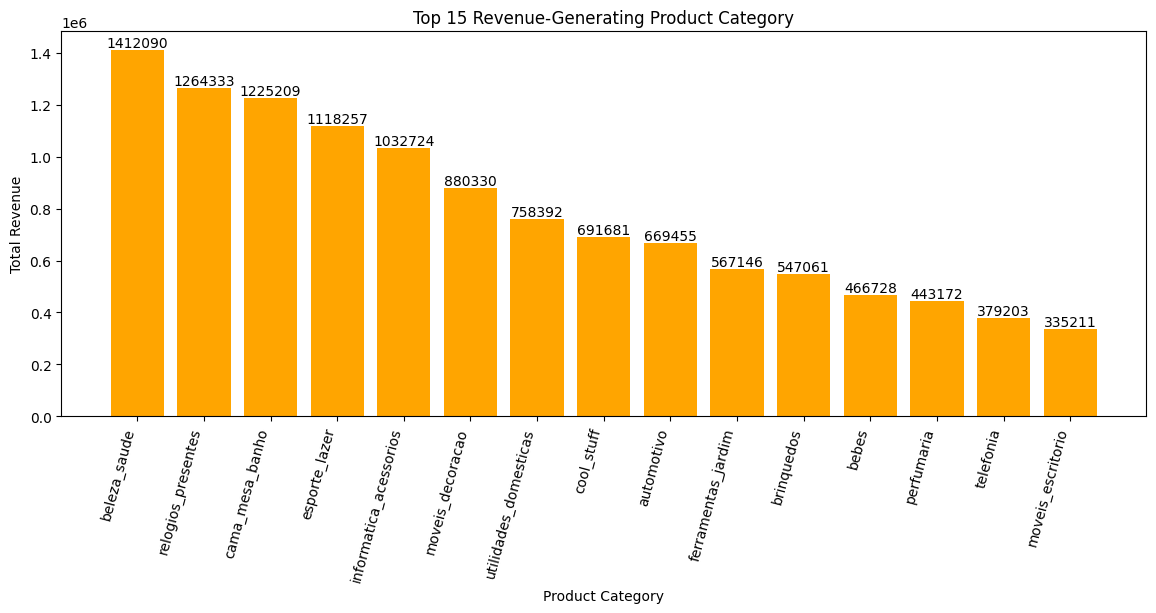

In [22]:
df_top_products = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT oi.order_id) AS total_orders
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    JOIN orders o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_revenue DESC
    LIMIT 15;
""")

# Plot top products by revenue
plt.figure(figsize=(14,5))
bars = plt.bar(df_top_products['product_category_name'], df_top_products['total_revenue'], color="orange")
plt.xticks(rotation=75, ha="right")
plt.title("Top 15 Revenue-Generating Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

# Add labels
plt.bar_label(bars, fmt="%.0f")
plt.show()


### 📦 Most Ordered Product Categories (Top 15)

**Observations & Insights:**
- **Bed, Bath & Table** leads with the highest number of orders (~9.2K), showing its strong demand as an everyday essential.
- **Beauty & Health** (~8.6K) and **Sports & Leisure** (~7.5K) also dominate, reflecting consistent consumer interest in self-care and lifestyle products.
- **Computers & Accessories** (~6.5K) and **Furniture & Decoration** (~6.3K) highlight significant demand for home and work-related categories.
- Categories like **Electronics** and **Baby Products**, though lower in total orders, still represent niche but important customer segments.

**Suggestions:**
- **High-frequency categories** (Bed, Bath & Table, Beauty & Health, Sports & Leisure) should be prioritized in marketing campaigns with **bundle deals, seasonal promotions, and subscription-style offers** to drive repeat purchases.
- **Moderate-demand categories** (Furniture & Decoration, Computers & Accessories) can benefit from **cross-selling strategies** (e.g., suggesting décor items with furniture or accessories with computers).
- **Low-order but essential categories** (Electronics, Baby Products) should be targeted with **awareness campaigns, influencer collaborations, or product education content** to grow visibility and increase conversion.
- Since many of these categories are **daily life essentials**, campaigns should emphasize **affordability, convenience, and fast delivery** to attract price-sensitive repeat buyers.



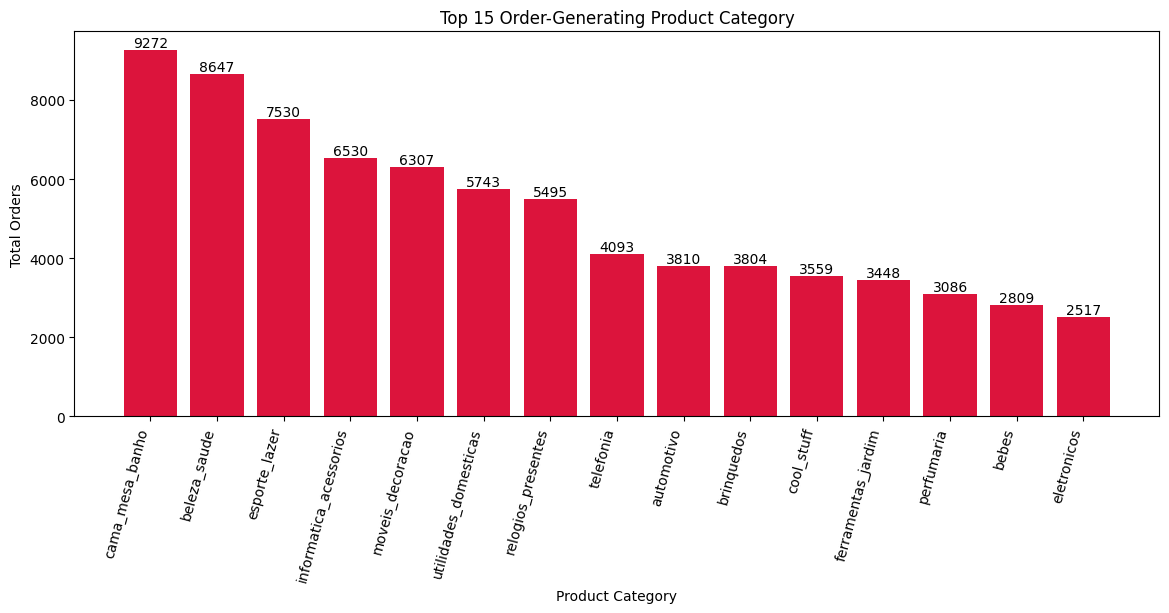

In [23]:
df_top_orders_prod = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT oi.order_id) AS total_orders
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    JOIN orders o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_orders DESC
    LIMIT 15;
""")

# Plot top products by revenue
plt.figure(figsize=(14,5))
bars = plt.bar(df_top_orders_prod['product_category_name'], df_top_orders_prod['total_orders'], color="crimson")
plt.xticks(rotation=75, ha="right")
plt.title("Top 15 Order-Generating Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Orders")

# Add labels
plt.bar_label(bars, fmt="%.0f")
plt.show()
